# 1. Yahoo Finance Data

In [34]:
# import yahoo finance library
# and get daily stock price data of dow jones index, s&p 500 index, and nasdaq, and each sector index
# from the 1980 to today
# and inser data into database

import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import sqlite3
import os
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt

# get the dow jones index, s&p 500 index, and nasdaq index
# from 1980 to today
# and insert data into database

def get_data(ticker_code, index_name, peroiod="max"):
    # get the data
    data = yf.Ticker(ticker_code)
    data = data.history(period=peroiod)
    data.insert(0, "code", index_name)

    ## change column name into small letters
    data = data.rename(columns={"Date": "date", "Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume", "Dividends": "dividends", "Stock Splits": "stock_splits"})
    data.index.name = "date"

    ## change data format
    data.index = pd.to_datetime(data.index, format='%d-%m-%Y')
    data.index = data.index.strftime('%Y-%m-%d')
    data["open"] = data["open"].astype(float)
    data["high"] = data["high"].astype(float)
    data["low"] = data["low"].astype(float)
    data["close"] = data["close"].astype(float)
    data["volume"] = data["volume"].astype(int)
    data["dividends"] = data["dividends"].astype(float)
    data["stock_splits"] = data["stock_splits"].astype(float)

    ## mange missing data
    data = data.replace([np.inf, -np.inf], np.nan)
    data = data.fillna(0)
    data = data.round(2)

    return data


# us stock indexes code: dow jones, s&p 500, nasdaq, russell 2000
# us stock sector indexes code: information technology, health care, consumer discretionary, consumer staples, energy, financials, industrials, materials, real estate, utilities
# us stock sector indexes code: XLK, XLV, XLY, XLP, XLE, XLF, XLI, XLB, XLRE, XLU

def get_index_data(codes=["^DJI", "^GSPC", "^IXIC", "^RUT", "XLK", "XLV", "XLY", "XLP", "XLE", "XLF", "XLI", "XLB", "XLRE", "XLU"],
                   indexes=["dow_jones", "s&p_500", "nasdaq", "russell_2000", "information_technology", "health_care", "consumer_discretionary", "consumer_staples", "energy", "financials", "industrials", "materials", "real_estate", "utilities"]):
    
    index_data_df = pd.DataFrame()

    for code, index in zip(codes, indexes):

        print("start = {}, {}".format(code, index))

        index_data = get_data(code, index)
        index_data_df = pd.concat([index_data_df, index_data])

        print("end = {}, {}".format(code, index))
        

    print(index_data_df.head())
    print(index_data_df.tail())
    print(index_data_df.shape)

    return index_data_df


In [18]:
codes = ["^DJI", "^GSPC", "^IXIC", "^RUT", "XLK", "XLV", "XLY", "XLP", "XLE", "XLF", "XLI", "XLB", "XLRE", "XLU"]
idexes = ["dow_jones", "s&p_500", "nasdaq", "russell_2000", "information_technology", "health_care", "consumer_discretionary", "consumer_staples", "energy", "financials", "industrials", "materials", "real_estate", "utilities"]

for code, index in zip(codes, idexes):
    print("start = {}, {}".format(code, index))

start = ^DJI, dow_jones
start = ^GSPC, s&p_500
start = ^IXIC, nasdaq
start = ^RUT, russell_2000
start = XLK, information_technology
start = XLV, health_care
start = XLY, consumer_discretionary
start = XLP, consumer_staples
start = XLE, energy
start = XLF, financials
start = XLI, industrials
start = XLB, materials
start = XLRE, real_estate
start = XLU, utilities


In [19]:
index_data_df = get_index_data(codes, idexes)

start = ^DJI, dow_jones
end = ^DJI, dow_jones
start = ^GSPC, s&p_500
end = ^GSPC, s&p_500
start = ^IXIC, nasdaq
end = ^IXIC, nasdaq
start = ^RUT, russell_2000
end = ^RUT, russell_2000
start = XLK, information_technology
end = XLK, information_technology
start = XLV, health_care
end = XLV, health_care
start = XLY, consumer_discretionary
end = XLY, consumer_discretionary
start = XLP, consumer_staples
end = XLP, consumer_staples
start = XLE, energy
end = XLE, energy
start = XLF, financials
end = XLF, financials
start = XLI, industrials
end = XLI, industrials
start = XLB, materials
end = XLB, materials
start = XLRE, real_estate
end = XLRE, real_estate
start = XLU, utilities
end = XLU, utilities
                 code    open     high      low   close    volume  dividends  \
date                                                                           
1992-01-02  dow_jones  3152.1  3172.63  3139.31  3172.4  23550000        0.0   
1992-01-03  dow_jones  3172.4  3210.64  3165.92  3201.5  236

# 2. Preprocessing

In [41]:
# Scale the data using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

def scale_data(data):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)
    return scaled_data

In [60]:
# index_data_df_test = index_data_df.copy()

# index_data_df_test['close'] = scale_data(index_data_df_test[['close']])

# index_data_df_test['close']

# index_data_df_test = scale_data(index_data_df.columns[["close"]].fillna(0))
# index_data_df_test.info()

date
1992-01-02    0.086111
1992-01-03    0.086902
1992-01-06    0.086864
1992-01-07    0.086992
1992-01-08    0.086968
                ...   
2023-04-17    0.001778
2023-04-18    0.001768
2023-04-19    0.001782
2023-04-20    0.001782
2023-04-21    0.001787
Name: close, Length: 110963, dtype: float64

# 3. Basic Analysis

In [33]:
index_data_df['code'].unique().tolist()

['dow_jones',
 's&p_500',
 'nasdaq',
 'russell_2000',
 'information_technology',
 'health_care',
 'consumer_discretionary',
 'consumer_staples',
 'energy',
 'financials',
 'industrials',
 'materials',
 'real_estate',
 'utilities']

In [62]:
# daily returns

def get_daily_returns(df):

    indexes = df['code'].unique().tolist()

    print(indexes)

    for index in indexes:

        df.loc[df["code"] == index]["close"].pct_change().fillna(0).plot()
        plt.xlabel("date")
        plt.ylabel("daily returns")
        plt.title(index)
        plt.show()

    # return df

#

['dow_jones', 's&p_500', 'nasdaq', 'russell_2000', 'information_technology', 'health_care', 'consumer_discretionary', 'consumer_staples', 'energy', 'financials', 'industrials', 'materials', 'real_estate', 'utilities']


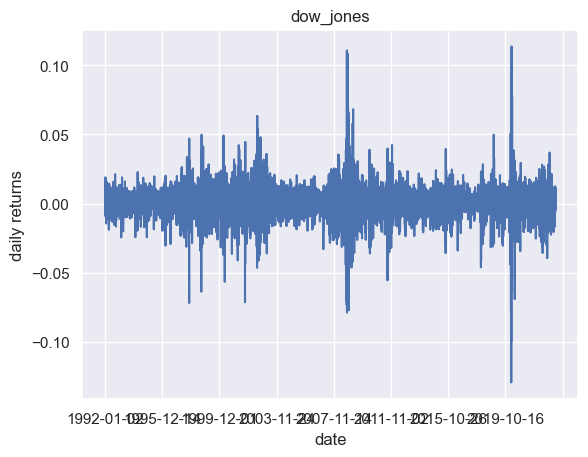

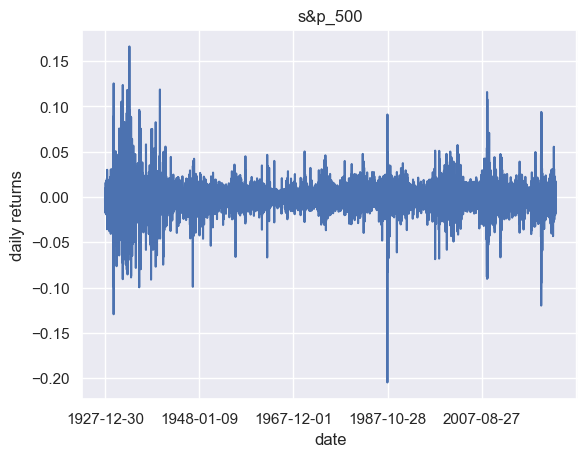

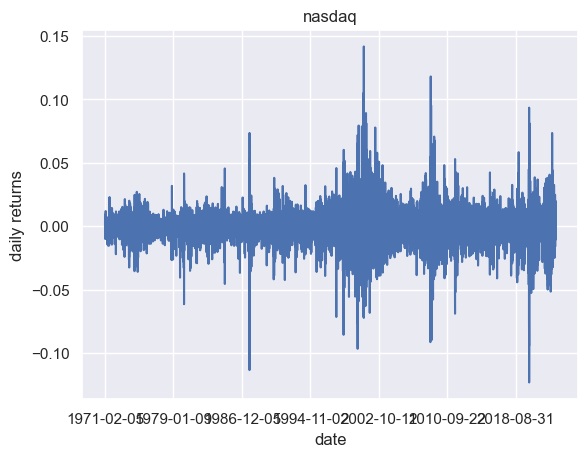

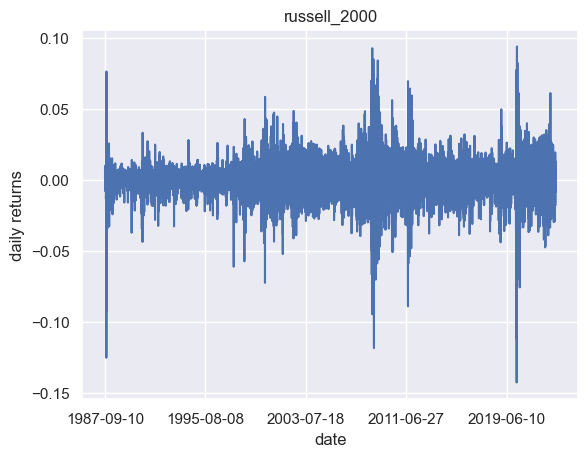

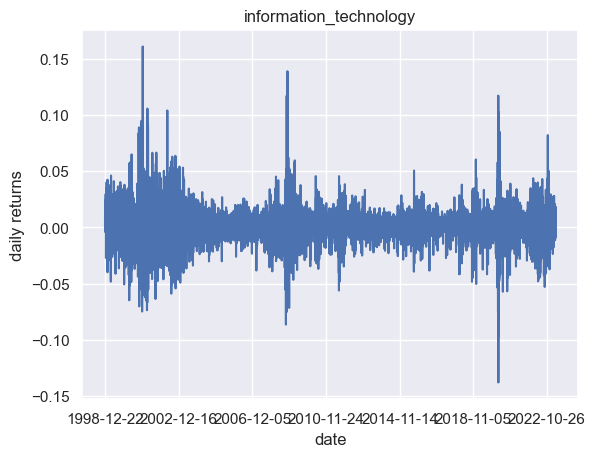

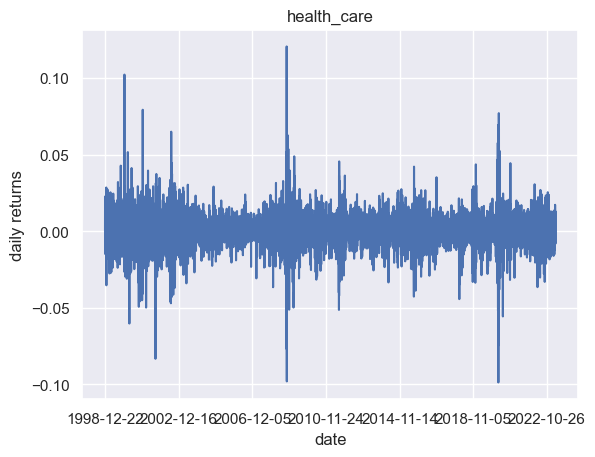

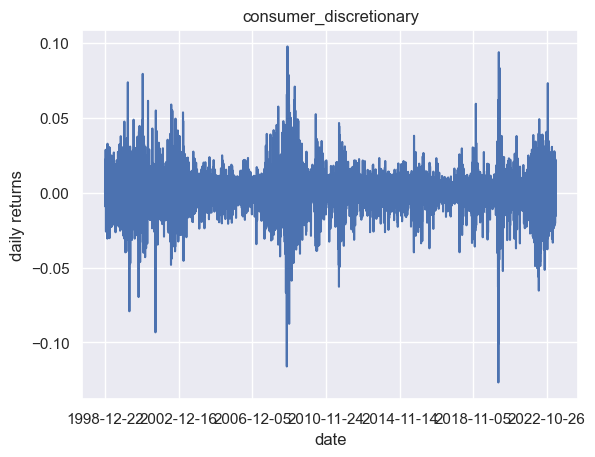

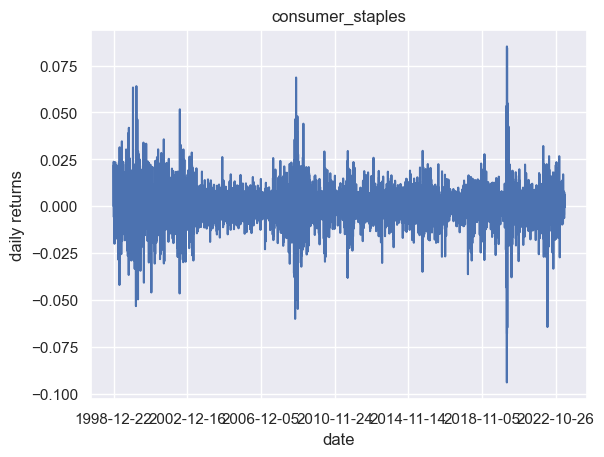

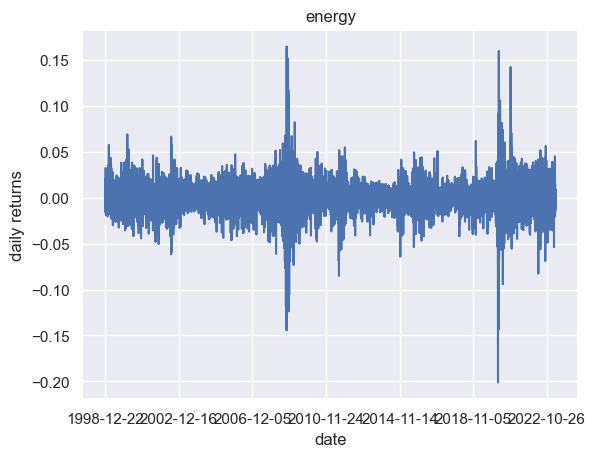

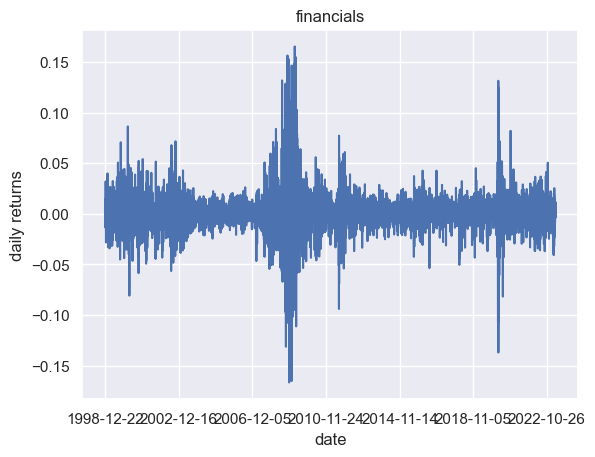

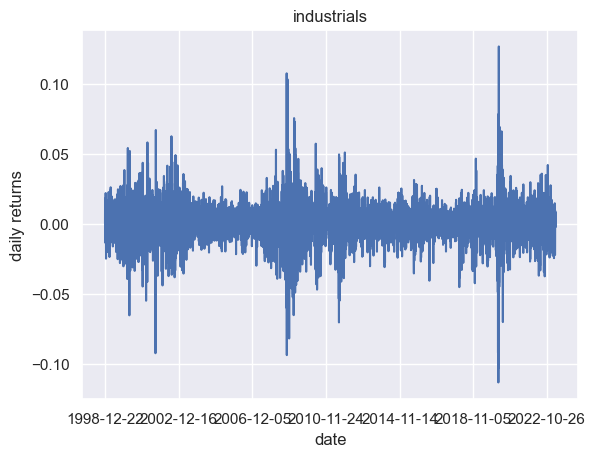

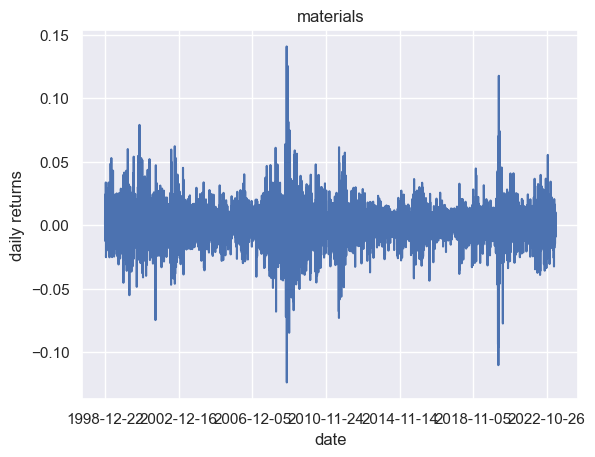

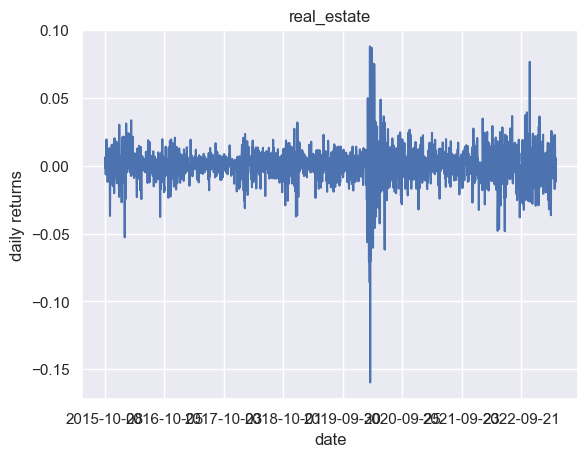

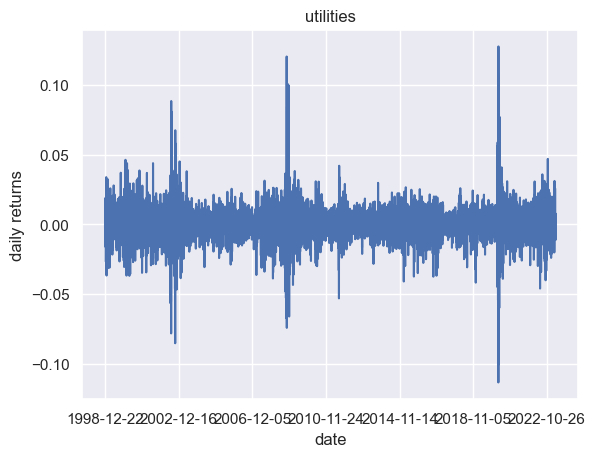

In [63]:
get_daily_returns(index_data_df)